In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [21]:
sigma = 225**(1/2)  # Стандартное отклонение
Z = 2.241 #%  # Квантиль нормального распределения. (если 𝛽 = 0.95, то 1 - α/2 = 0,975, двухсторонний квантиль = 2.241)
Delta = 3 #%         #Погрешность

In [22]:
N = int(((sigma*Z)/Delta)**2)
N

125

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [25]:
n = 25
m = 130
se = 15
confidence = 0.98
h = se * stats.t.ppf((1 + confidence)/2, n)
L = round((m-h) - (m+h))
print (L)

-75.0


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [128]:
import scipy.stats as stats
population_men  = stats.norm.rvs(loc=171, scale=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000000)  # Выборка женщин со средним ростом 165

In [129]:
t, p = stats.ttest_ind(population_men, population_women)
t, p

(820.9242812380394, 0.0)

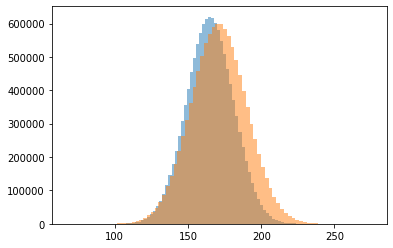

In [131]:
plt.hist(population_women, bins=80, alpha = 0.5);
plt.hist(population_men, bins=80, alpha = 0.5);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [40]:
sigma = 150  # Стандартное отклонение
Z = 2.241 #%  # Квантиль нормального распределения. (если 𝛽 = 0.95, то 1 - α/2 = 0,975, двухсторонний квантиль = 2.241)
Delta = 50 #%         #Погрешность

In [41]:
N = int(((sigma*Z)/Delta)**2)
N

45

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [138]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [139]:
oddsratio, pvalue = stats.fisher_exact(observations)
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

Он умеет с определенной вероятностью предсказывать погоду, так как p-value очень больше уровеня значимости (0.05), и показатель теста Фишера блтзок к 1

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [47]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [48]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [49]:
mean_confidence_interval(data, confidence=0.90)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [50]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

Проверка гипотез с помощью python

In [89]:
stats.ttest_ind(data_1, data_2, equal_var = False)

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

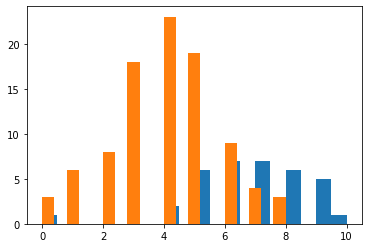

In [66]:
plt.hist(data_1, bins=20); #Выборка 1
plt.hist(data_2, bins=20);  #Выборка 2

**выборки очень различны и это подтверждает очень маленькое значение pvalue, что также видно визуально**

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Я считаю, что мы все же создаем при проверки гипотезы нормально распределение из ненормального логарифмическим путем, что также не инстинно первоначально, поэтому здесь больше отталкиваемся от уровня значимости, чтобы оценить p-value = 0.03, хотя в целом показатель довольно неплохой.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [119]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

In [123]:
stats.ttest_ind(a=A, b=B)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284593140469285)

**Значение `pvalue= 0.0513` говорит о том, что существует вероятность 5.13%, что данные выборки настолько далеко друг от друга
для двух одинаковых групп. Это чуть больше, чем уровень достоверности 5%.**

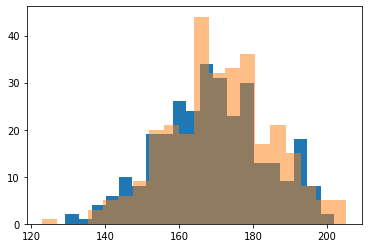

In [127]:
plt.hist(A, bins=20);
plt.hist(B, bins=20, alpha=0.5);

выборки незначительно отличаются, это видно визуально